# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Explore Data

In [2]:
df=pd.read_csv('netflix_data.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


Data Size(7789 rows,11columns)

there are missing data in (Director,Cast,Country,Release_Date,Rating)

all features object type we need convert some columns to right type

Release_Date->Date




# Preprocessing Data

In [4]:
df.duplicated().sum()

0

There are no duplicated row in datasets

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

Director column have many missing value 2388

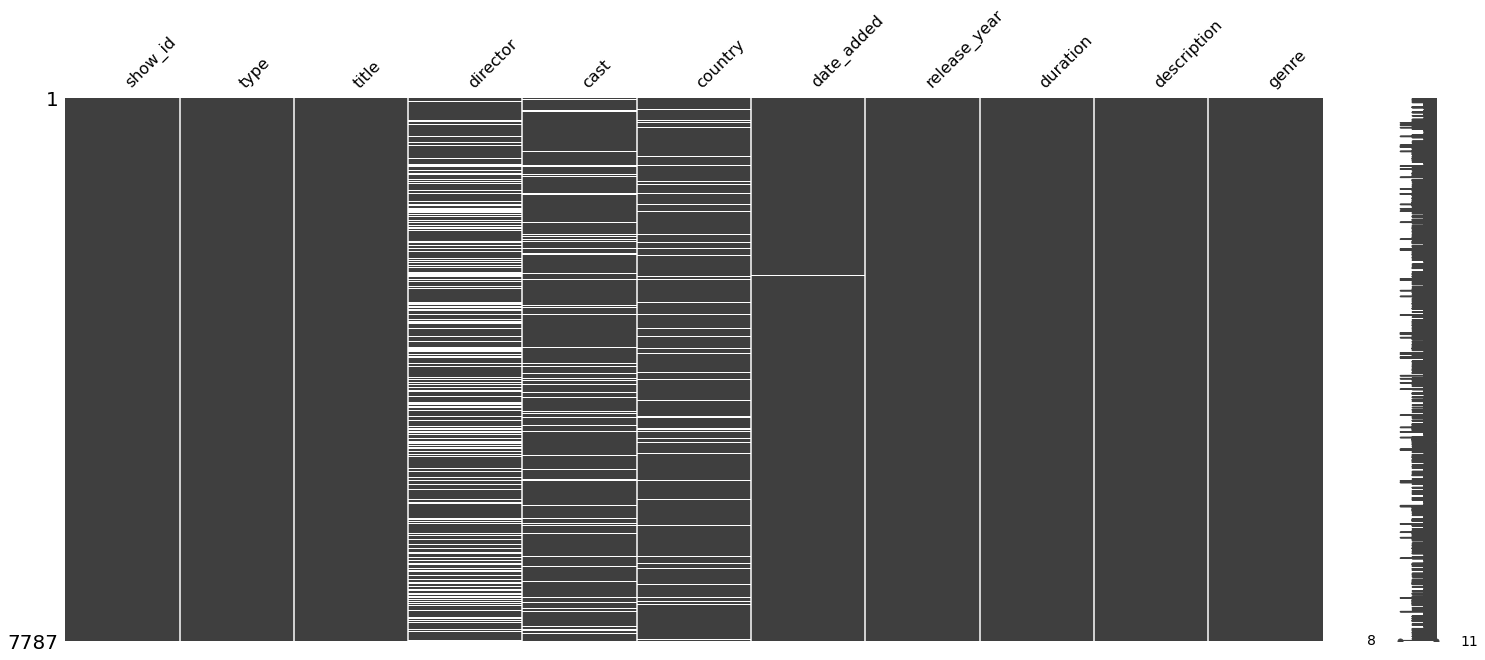

In [6]:
#check missing data by missingno
missingno.matrix(df)
plt.show()

# EDA

# Q:what the most year in netflix app?

In [7]:
year_top_10=pd.DataFrame(df.release_year.value_counts()[:10]).reset_index()
year_top_10.columns=['year','count']

In [8]:
year_top_10.sort_values

<bound method DataFrame.sort_values of    year  count
0  2018   1121
1  2017   1012
2  2019    996
3  2016    882
4  2020    868
5  2015    541
6  2014    334
7  2013    267
8  2012    219
9  2010    173>

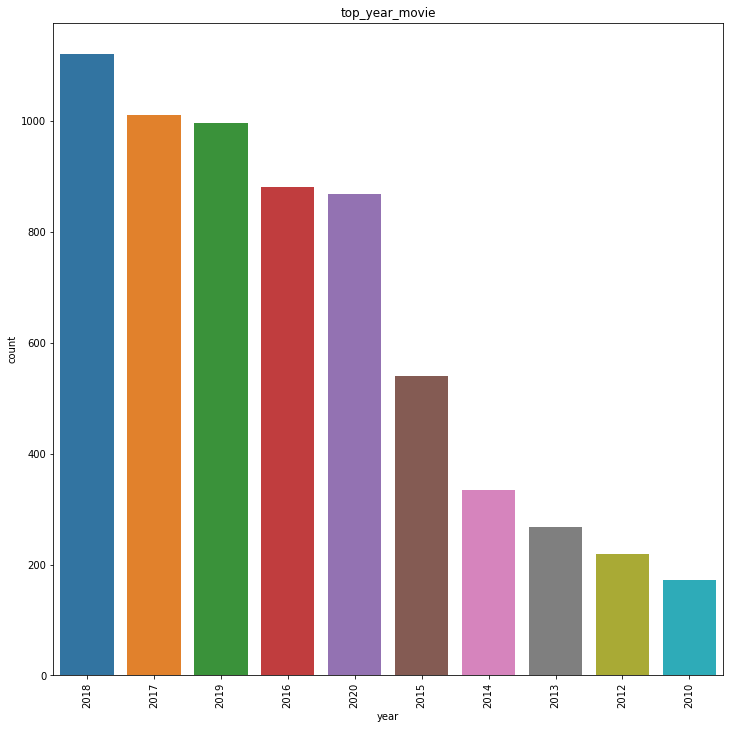

In [9]:
plt.figure(figsize=(12,12))
sns.barplot(x='year',y='count',data=year_top_10,order=year_top_10.year.value_counts().index)
plt.xticks(rotation = 90)
plt.title("top_year_movie")
plt.show()

there are growth in 2016 

# Q:what is the change in duration over years?


In [10]:
df_tv_show=df[df['type']=='TV Show']
df_tv_movie=df[df['type']=='Movie']

In [11]:
duration_year_show=pd.DataFrame(df_tv_show.groupby('release_year')['duration'].mean()).reset_index()
duration_year_movie=pd.DataFrame(df_tv_movie.groupby('release_year')['duration'].mean()).reset_index()
duration_year_show.columns=['year','avg_duration']
duration_year_movie.columns=['year','avg_duration']

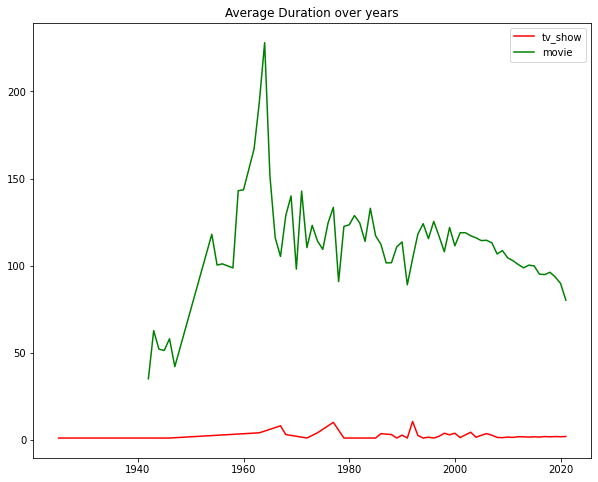

In [12]:
plt.figure(figsize=(10,8))
plt.plot(duration_year_show['year'],duration_year_show['avg_duration'],color='r',label='tv_show')
plt.plot(duration_year_movie['year'],duration_year_movie['avg_duration'],color='g',label='movie')

# Create a title
plt.title("Average Duration over years")
plt.legend()
# Show the plot
plt.show()

the movies in 60s exceeds 200 mins

the duration of movies after 1970 still decrease until 2020

Q3:which tv type has max duration?

In [13]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

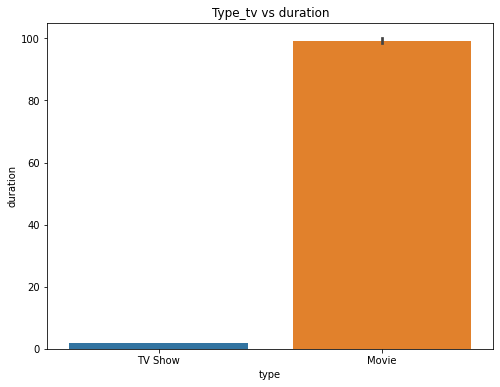

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x='type',y='duration',data=df)
plt.title("Type_tv vs duration")
plt.show()

# Q4:Which country has more movie?

In [15]:
country_count=pd.DataFrame(df.groupby('country')['show_id'].count()).reset_index()
country_count.columns=['country','count']

In [16]:
Top_10_country=country_count.sort_values('count',ascending=False)[:10]

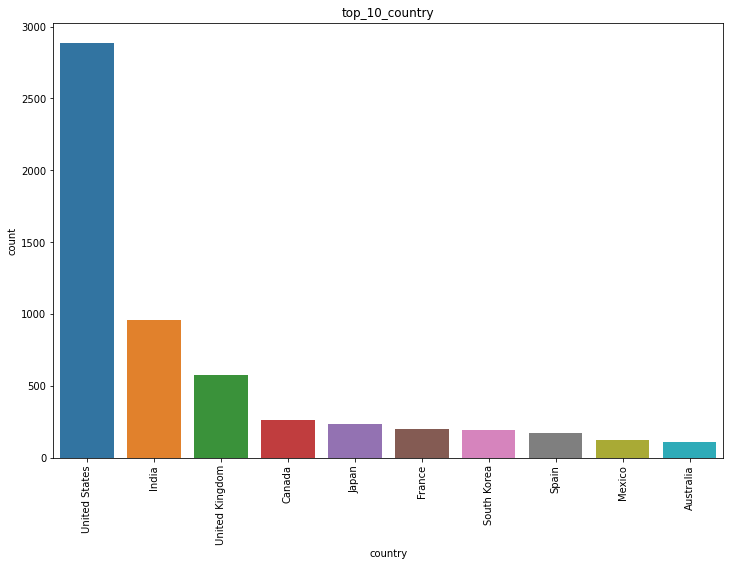

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x='country',y='count',data=Top_10_country)
plt.xticks(rotation = 90)
plt.title("top_10_country")
plt.show()

# Q5:change duration depend on  genre?

In [18]:
df['genre'].value_counts()[:5]

Dramas              1384
Comedies            1074
Documentaries        751
Action               721
International TV     690
Name: genre, dtype: int64

In [19]:
genre_duration=pd.DataFrame(df.groupby('genre')['duration'].mean()).reset_index()

genre_duration.columns=['genre','avg']
genre_duration=genre_duration.sort_values('avg',ascending=False)

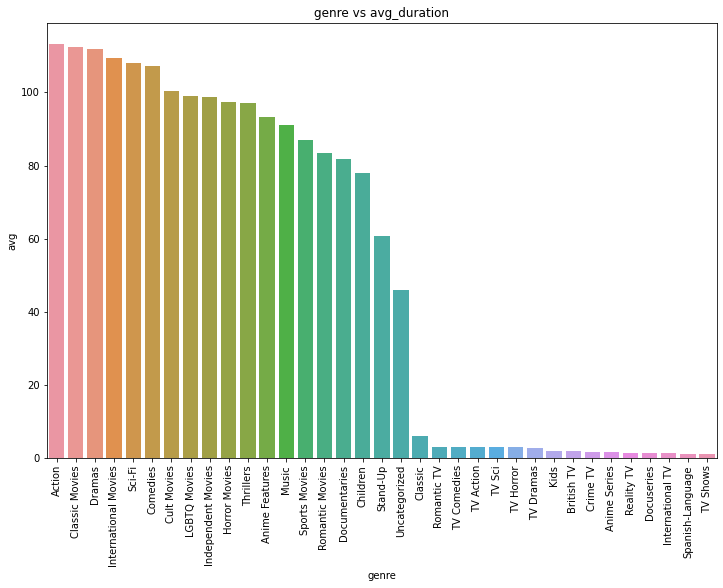

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(x='genre',y='avg',data=genre_duration)
plt.xticks(rotation = 90)
plt.title("genre vs avg_duration")
plt.show()

# Q:6 which movie has duration less than 60?

In [21]:
movie_less_60=df_tv_movie[df_tv_movie['duration']<60]
movie_less_60

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
35,s36,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,"December 1, 2016",2016,56,This documentary celebrates the 50th anniversa...,Documentaries
55,s56,Movie,100 Things to do Before High School,NaN,"Isabela Moner, Jaheem Toombs, Owen Joyner, Jac...",United States,"November 2, 2019",2014,44,"Led by seventh-grader C.J., three students who...",Uncategorized
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,37,Oprah Winfrey sits down with director Ava DuVe...,Uncategorized
101,s102,Movie,3 Seconds Divorce,Shazia Javed,NaN,Canada,"June 15, 2019",2018,53,A Muslim women's activist group in India prote...,Documentaries
146,s147,Movie,A 3 Minute Hug,Everardo González,NaN,Mexico,"October 28, 2019",2019,28,This documentary captures the joy and heartbre...,Documentaries
...,...,...,...,...,...,...,...,...,...,...,...
7679,s7680,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,45,Filmmaker John Huston narrates this Oscar-nomi...,Documentaries
7692,s7693,Movie,Ya no estoy aquí: Una conversación entre Guill...,NaN,"Guillermo del Toro, Alfonso Cuarón",NaN,"November 3, 2020",2020,15,Guillermo del Toro and Alfonso Cuarón discuss ...,Documentaries
7718,s7719,Movie,Yoo Byung Jae: Discomfort Zone,Y. Joon Chung,Yoo Byung Jae,South Korea,"August 17, 2018",2018,54,Daring comedian Yoo Byung-jae connects critici...,Stand-Up
7771,s7772,Movie,Zion,Floyd Russ,Zion Clark,United States,"August 10, 2018",2018,12,Born without legs and stuck in foster care for...,Documentaries


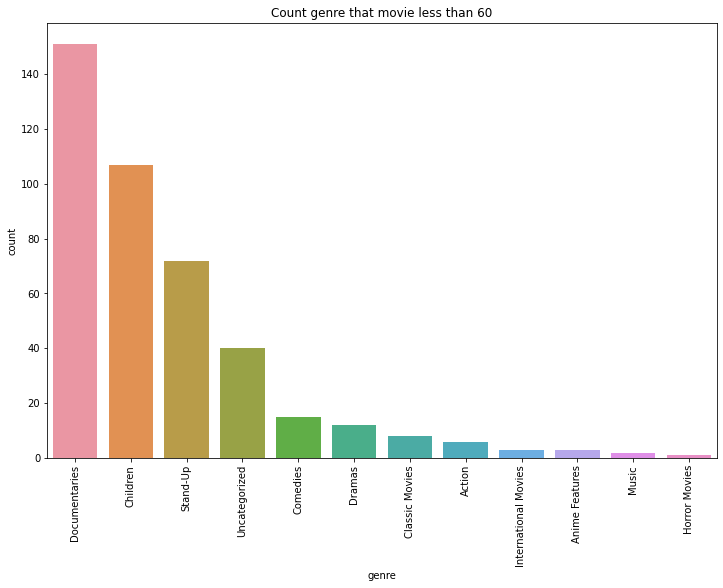

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x='genre',data=movie_less_60,order =movie_less_60['genre'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("Count genre that movie less than 60")
plt.show()

# Q7:which movie has more than 120 min?

In [23]:
movie_more_120=df_tv_movie[df_tv_movie['duration']>120]
movie_more_120

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,"September 1, 2019",2014,149,Against the backdrop of Nigeria's looming inde...,Dramas
17,s18,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...",Norway,"October 10, 2018",2018,144,"After devastating terror attacks in Norway, a ...",Dramas
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,124,"On India's Independence Day, a zany mishap in ...",Comedies
...,...,...,...,...,...,...,...,...,...,...,...
7762,s7763,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,131,A philandering small-town mechanic's political...,Comedies
7764,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",2018,159,Through his relationships with two wildly diff...,Comedies
7768,s7769,Movie,Zindagi Kitni Haseen Hay,Anjum Shahzad,"Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...",Pakistan,"October 1, 2018",2016,126,Two young parents struggle to keep their marri...,Dramas
7769,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,154,Three friends on an adventurous road trip/bach...,Comedies


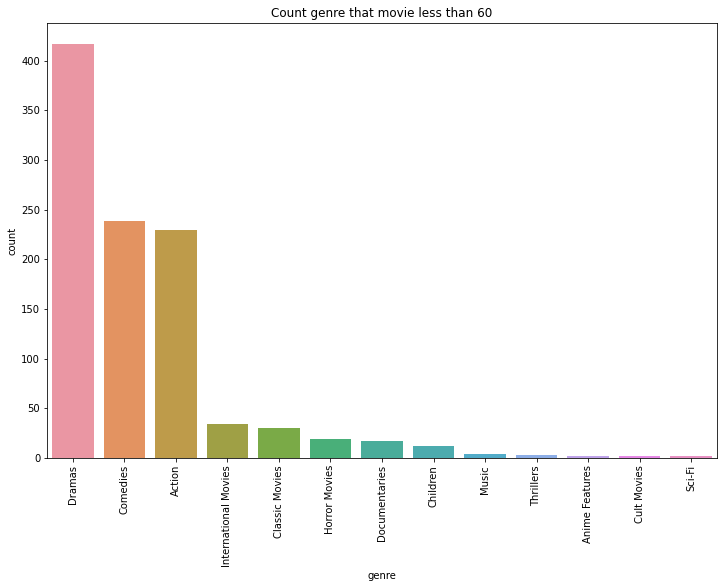

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x='genre',data=movie_more_120,order =movie_more_120['genre'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("Count genre that movie less than 60")
plt.show()